In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/marcosemn/Dados_Aluguel_BH/main/Dados-Aluguel-BH-carlos-prates_Manipulacao.csv'

In [ ]:
df=pd.read_csv(url,encoding='latin')
del df['neighborhood']
del df['city']
del df['state']
df.dropna()
df.head()

,area (m²),número de quartos,aluguel,street
0,3100.0,-1.0,165000.0,NaN
1,1800.0,-1.0,35000.0,NaN
2,1100.0,-1.0,24000.0,Avenida Dom Pedro Ii
3,1300.0,-1.0,13000.0,Avenida Nossa Senhora De Fátima
4,800.0,-1.0,6500.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area (m²)          133 non-null    float64
 1   número de quartos  133 non-null    float64
 2   aluguel            133 non-null    float64
 3   street             116 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area (m²),133.0,103.127820,345.892990,15.0,18.0,23.0,45.0,3100.0
número de quartos,133.0,1.045113,0.894975,-1.0,1.0,1.0,1.0,5.0
aluguel,133.0,2927.458647,14644.161224,400.0,900.0,1096.0,1200.0,165000.0


In [ ]:
df.shape

(133, 4)

In [ ]:
df['street'].value_counts()

Avenida Nossa Senhora De Fátima    81
Rua Bagé                           12
Avenida Dom Pedro Ii                9
Rua Entre Rios                      5
Rua Peçanha                         2
Rua Areado                          2
Rua Rio Pomba                       2
Rua Itambacuri 305                  1
Rua Padre Eustáquio                 1
Av.carlos Luz  117                  1
Name: street, dtype: int64

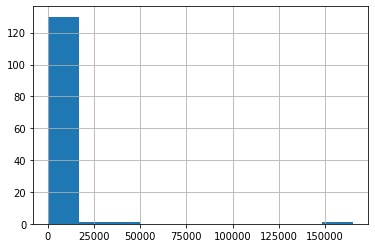

In [ ]:
df['aluguel'].hist()

In [ ]:
#Eliminar Outliers
aluguel_maximo = 8000
filtro_aluguel_maximo = df['aluguel']<=aluguel_maximo
df_filtrado = df[filtro_aluguel_maximo]
df_filtrado.head()

,area (m²),número de quartos,aluguel,street
4,800.0,-1.0,6500.0,NaN
5,318.0,4.0,4500.0,Rua Areado
6,316.0,4.0,4500.0,Rua Areado
7,280.0,3.0,3500.0,NaN
8,535.0,-1.0,3300.0,Av.carlos Luz 117


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 4 to 132
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area (m²)          129 non-null    float64
 1   número de quartos  129 non-null    float64
 2   aluguel            129 non-null    float64
 3   street             114 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.0+ KB


In [ ]:
df_filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
area (m²),129.0,49.736434,94.295539,15.0,18.0,20.0,40.0,800.0
número de quartos,129.0,1.108527,0.831417,-1.0,1.0,1.0,1.0,5.0
aluguel,129.0,1181.023256,752.459898,400.0,900.0,1000.0,1190.0,6500.0


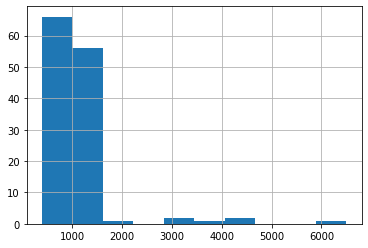

In [ ]:
df_filtrado['aluguel'].hist()

Text(0, 0.5, 'Aluguel')

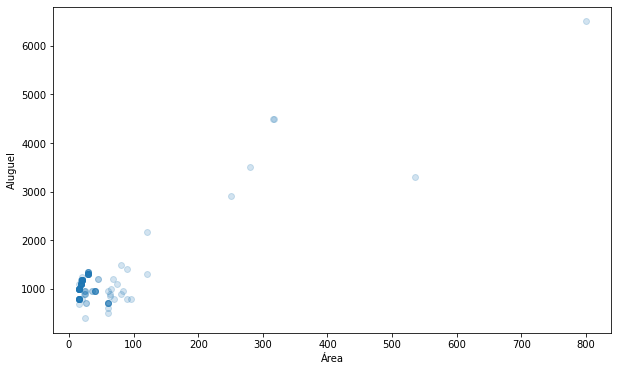

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['area (m²)'], df_filtrado['aluguel'], alpha=0.2)
plt.xlabel('Área')
plt.ylabel('Aluguel')

In [ ]:
df_filtrado['street'].value_counts()

Avenida Nossa Senhora De Fátima    80
Rua Bagé                           12
Avenida Dom Pedro Ii                8
Rua Entre Rios                      5
Rua Peçanha                         2
Rua Areado                          2
Rua Rio Pomba                       2
Rua Itambacuri 305                  1
Rua Padre Eustáquio                 1
Av.carlos Luz  117                  1
Name: street, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

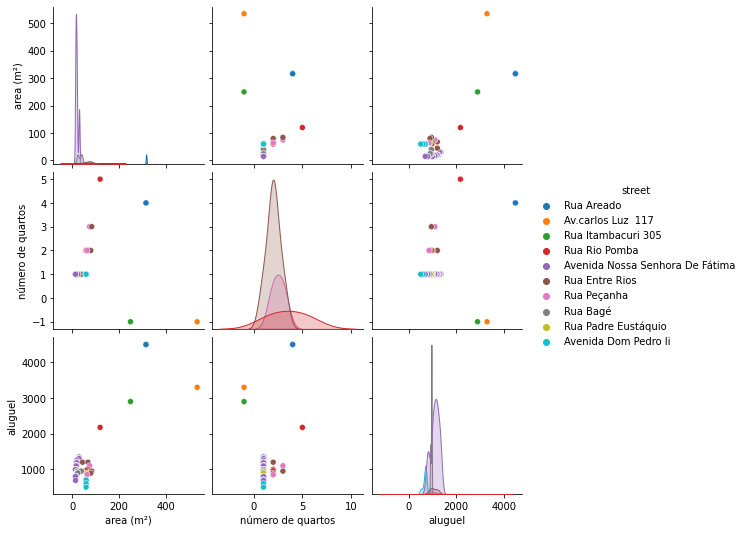

In [ ]:
sns.pairplot(df_filtrado, hue='street')

In [ ]:
df_filtrado.corr()

,area (m²),número de quartos,aluguel
area (m²),1.000000,-0.024844,0.886576
número de quartos,-0.024844,1.000000,0.133891
aluguel,0.886576,0.133891,1.000000


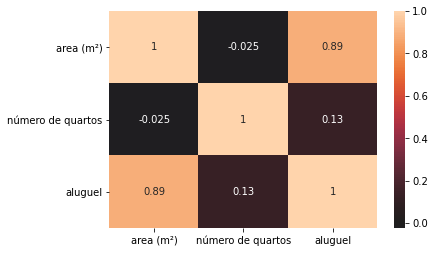

In [ ]:
sns.heatmap(df_filtrado.corr(), annot=True, center=0)

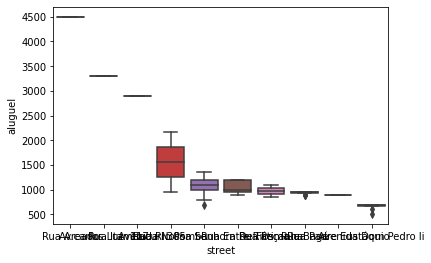

In [ ]:
sns.boxplot(x='street', y='aluguel', data=df_filtrado)

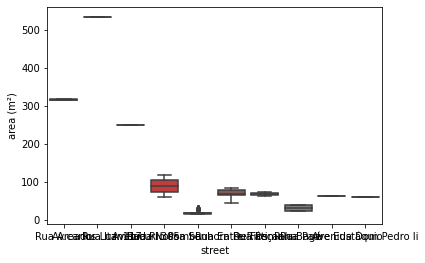

In [ ]:
sns.boxplot(x='street', y='area (m²)', data=df_filtrado)